# Disease prediction

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:


from sklearn.preprocessing import StandardScaler # importing StandardScaler

# using GridSearchCV to find the best parameters for the models

from sklearn.model_selection import GridSearchCV # importing GridSearchCV

# Importing chosen models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# importing the train_test_split function
from sklearn.model_selection import train_test_split

# importing the accuracy_score function
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score

# importing VotingClassifier
from sklearn.ensemble import VotingClassifier


In [108]:
# Importing the dataset

path = "../data/"
file_name = "cardio_train.csv"

df = pd.read_csv(path + file_name, sep=";")
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [109]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

[Text(0.5, 1.0, 'Cardiovascular Disease'),
 Text(0.5, 0, '0 = Healthy     1 = Diagnosed with CD'),
 Text(0, 0.5, 'Count')]

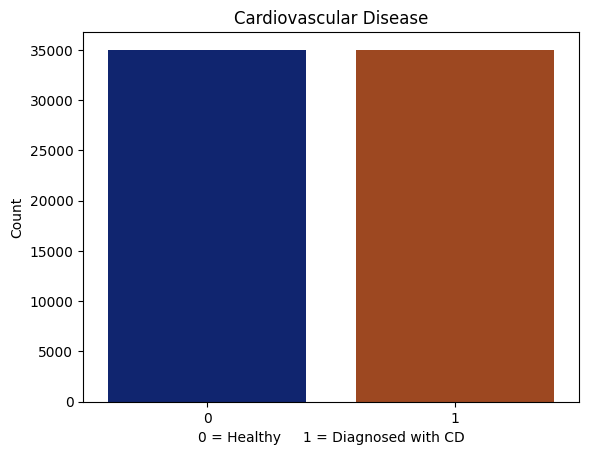

In [110]:
# Finding out how many people have cardiovascular disease and how many don't

ax = sns.countplot(x="cardio", data=df, palette="dark")


ax.set(title="Cardiovascular Disease", xlabel="0 = Healthy     1 = Diagnosed with CD", ylabel="Count")

#Todo remove backround color

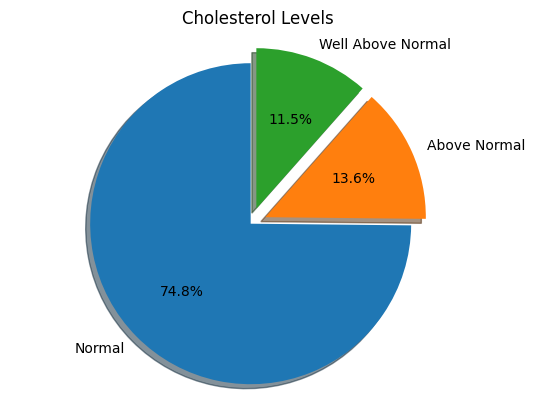

In [111]:
# Visualising cholesterol levels with a pie chart

labels = ["Normal", "Above Normal", "Well Above Normal"]
sizes = df["cholesterol"].value_counts()
explode = (0, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Cholesterol Levels")
plt.show()
#Todo remove backround color

In [112]:
# Converting age from days to years

df["age"] = df["age"] / 365
df["age"] = df["age"].astype("int")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


[Text(0.5, 1.0, 'Age Distribution'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Count')]

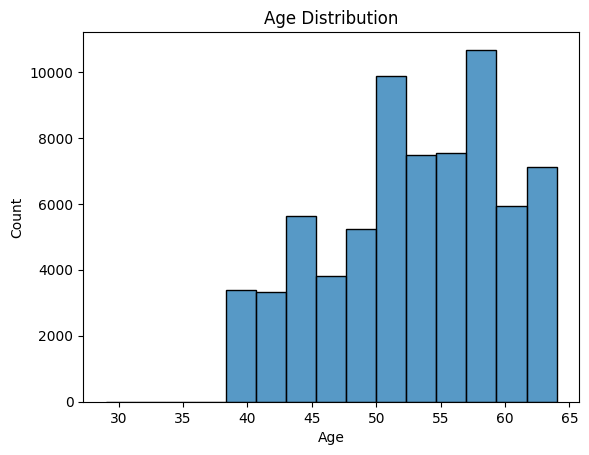

In [113]:
# Plotting histogram of age

ax = sns.histplot(df["age"], bins=15)
ax.set(title="Age Distribution", xlabel="Age", ylabel="Count")

#Todo remove backround color
# Change y label to %

[Text(0.5, 1.0, 'Smokers vs Non-Smokers'),
 Text(0.5, 0, '0 = Non-Smoker     1 = Smoker'),
 Text(0, 0.5, 'Count')]

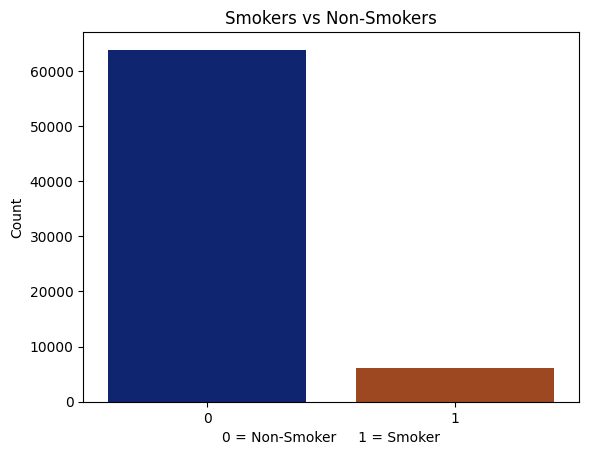

In [114]:
# Showing how many are smokers and non smokers

ax = sns.countplot(x="smoke", data=df, palette="dark")
ax.set(title="Smokers vs Non-Smokers", xlabel="0 = Non-Smoker     1 = Smoker", ylabel="Count")
#Todo remove backround color

[Text(0.5, 1.0, 'Weight Distribution'),
 Text(0.5, 0, 'Weight'),
 Text(0, 0.5, 'Count')]

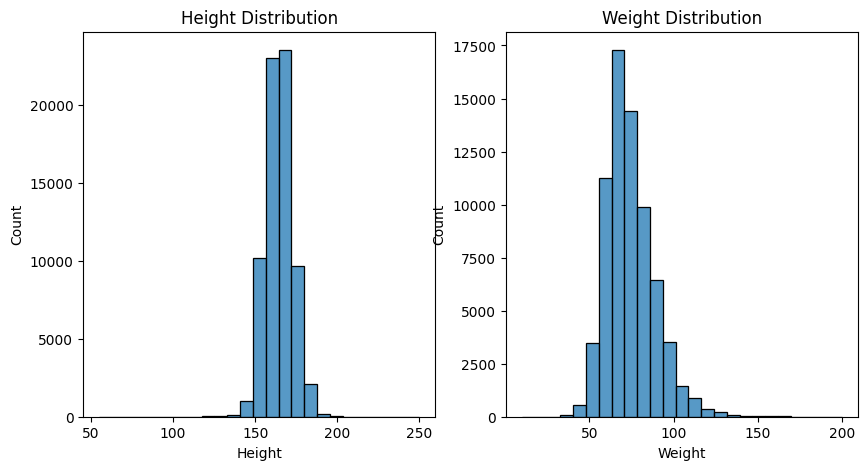

In [115]:
# Visualising weight, height distribution in subplots

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df["height"], bins=25, ax=ax1)
sns.histplot(df["weight"], bins=25, ax=ax2)
ax1.set(title="Height Distribution", xlabel="Height", ylabel="Count")
ax2.set(title="Weight Distribution", xlabel="Weight", ylabel="Count")
#Todo remove backround color
# Fix these graphs


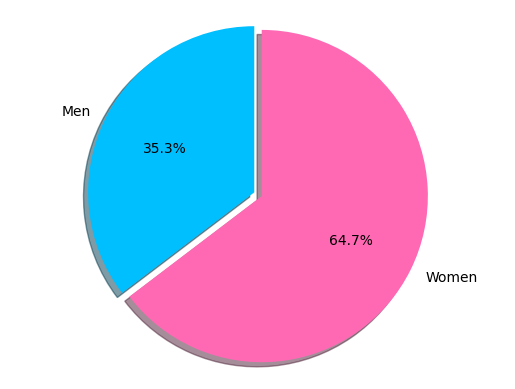

In [116]:
# creating two new dataframes containing the men and women who have cardiovascular disease

df_men_cardio_disease = df[(df["gender"] == 2) & (df["cardio"] == 1)]
df_women_cardio_disease = df[(df["gender"] == 1) & (df["cardio"] == 1)]

# plotting the distribution between men and women with a pie chart

labels = ["Men", "Women"]
data = [len(df_men_cardio_disease), len(df_women_cardio_disease)]
explode = (0, 0.05) # Separating the pie parts from each other for easier viewing

fig1, ax1 = plt.subplots()
ax1.pie(data, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90, colors=["#00bfff", "#ff69b4"])
ax1.axis("equal")
plt.show()


#Todo remove backround color


[Text(0.5, 1.0, 'BMI Distribution'),
 Text(0.5, 0, 'BMI'),
 Text(0, 0.5, 'Count')]

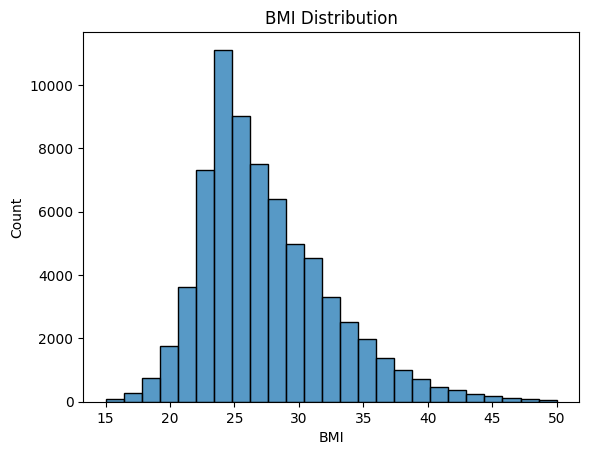

In [117]:
# Creating a new column for the BMI

df["bmi"] = round(df["weight"] / ((df["height"] / 100) ** 2), 2)

# checking for bmi outliers

df_bmi_outliers = df[(df["bmi"] < 15) | (df["bmi"] > 50)]

# removing the outliers using the df_bmi_outliers dataframe

df = df.drop(df_bmi_outliers.index)

# plotting the distribution of bmi

ax = sns.histplot(df["bmi"], bins=25)
ax.set(title="BMI Distribution", xlabel="BMI", ylabel="Count")
#Todo remove backround color




# MARKDOWN TEXT FOR SHOWING HOW I GOT TO REMOVE 15 and over 50 in my BMI 

In [118]:
# Creating a bmi feature for with the following categories: normal range, overweight, obese (class 1), obese (class 2), obese (class 3)

def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    if bmi < 25:
        return "Normal"
    if bmi < 30:
        return "Overweight"
    if bmi < 35:
        return "Obese Class 1"
    if bmi < 40:
        return "Obese Class 2"
    else:
        return "Obese Class 3"

# creating a new column for the bmi category

df["bmi_category"] = df["bmi"].apply(bmi_category) # applying the bmi_category function to the bmi column

df.head(6)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97,Normal
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93,Obese Class 1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51,Normal
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71,Overweight
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01,Normal
5,8,60,1,151,67.0,120,80,2,2,0,0,0,0,29.38,Overweight


In [119]:
# Feature engineering blood pressure

# creating a new column for the blood pressure category
# Categories: Healthy, Elevated, Stage 1 Hypertension, Stage 2 Hypertension, Hypertensive Crisis

def blood_pressure_category(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return "Healthy"
    if systolic < 130 and diastolic < 80:
        return "Elevated"
    if systolic < 140 or diastolic < 90:
        return "Stage 1 Hypertension"
    if systolic < 180 or diastolic < 120:
        return "Stage 2 Hypertension"
    else:
        return "Hypertensive Crisis"

df["blood_pressure_category"] = df.apply(lambda x: blood_pressure_category(x["ap_hi"], x["ap_lo"]), axis=1)

df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,blood_pressure_category
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97,Normal,Stage 1 Hypertension
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93,Obese Class 1,Stage 2 Hypertension
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51,Normal,Stage 1 Hypertension
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71,Overweight,Stage 2 Hypertension
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01,Normal,Healthy


# TODO ADD WHY I CHOOSE THESE NUMBERS

- https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
- and common sense. Need to change values.

In [120]:
# Removing blood pressure outliers

df_blood_pressure_outliers = df[(df["ap_hi"] < 50) | (df["ap_hi"] > 250) | (df["ap_lo"] < 30) | (df["ap_lo"] > 200)] # finding the outliers
df = df.drop(df_blood_pressure_outliers.index) # removing the outliers

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,blood_pressure_category
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97,Normal,Stage 1 Hypertension
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93,Obese Class 1,Stage 2 Hypertension
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51,Normal,Stage 1 Hypertension
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71,Overweight,Stage 2 Hypertension
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01,Normal,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,57,1,165,80.0,150,80,1,1,0,0,1,1,29.38,Overweight,Stage 1 Hypertension
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0,26.93,Overweight,Stage 1 Hypertension
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.35,Obese Class 1,Stage 2 Hypertension
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.10,Overweight,Stage 1 Hypertension


Couldt really find any weight and height outliers.

In [121]:
# Finding height and weight outliers

df_height_outliers = df[(df["height"] < 100) | (df["height"] > 250)]


df_weight_outliers = df[(df["weight"] < 35) | (df["weight"] > 200)]
display(df_weight_outliers, df_height_outliers)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,blood_pressure_category
3752,5306,42,1,120,30.0,110,70,1,1,0,0,1,0,20.83,Normal,Healthy
14722,21040,62,1,143,34.0,100,70,1,1,0,0,1,0,16.63,Underweight,Healthy
22016,31439,42,1,146,32.0,100,70,1,1,0,0,0,0,15.01,Underweight,Healthy
34276,48976,40,2,128,28.0,120,80,1,1,0,0,1,0,17.09,Underweight,Stage 1 Hypertension
35314,50443,54,1,146,32.0,130,80,1,2,0,0,0,0,15.01,Underweight,Stage 1 Hypertension
48080,68667,52,1,143,33.0,100,60,1,1,0,0,1,0,16.14,Underweight,Healthy
51837,73914,54,2,139,34.0,120,70,1,1,0,0,1,0,17.60,Underweight,Elevated


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,blood_pressure_category


[Text(0.5, 1.0, 'BMI Category vs Cardiovascular Disease'),
 Text(0.5, 0, 'BMI Category'),
 Text(0, 0.5, 'Count')]

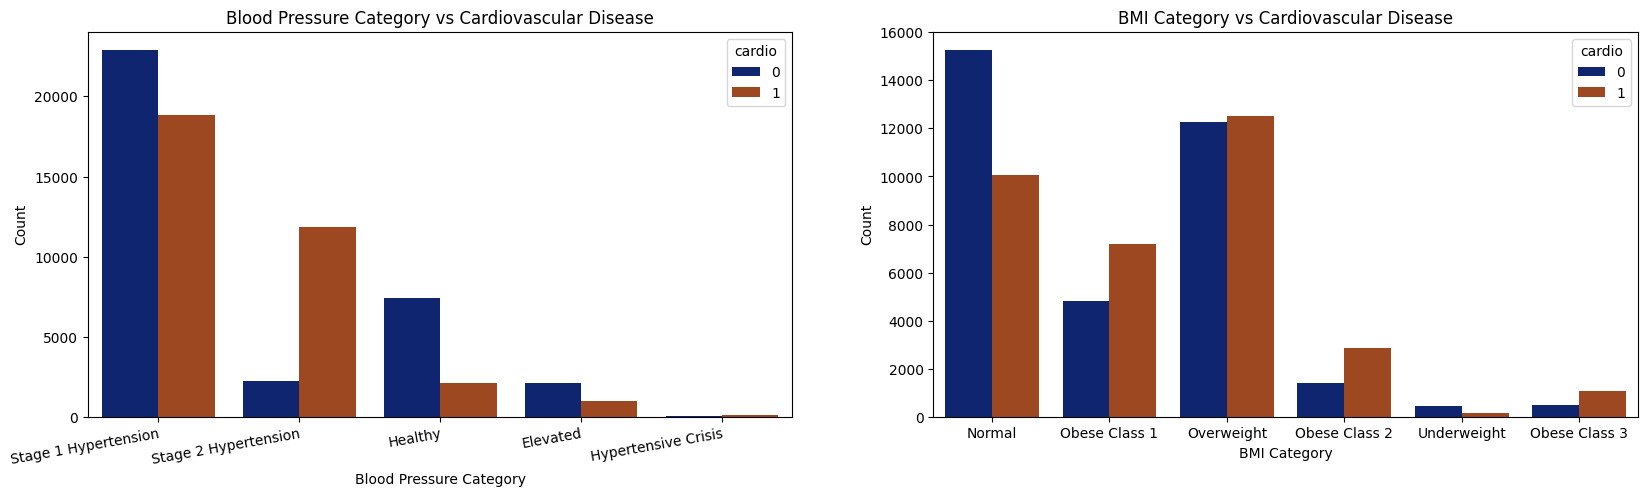

In [122]:
# Creating two subplots for the cardivascular disease and blood pressure category and the cardivascular disease and bmi category

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Creating a bar plot showing ammount of people with cardiovascular disease and without cardiovascular disease for each blood pressure category

ax1 = sns.countplot(x="blood_pressure_category", hue="cardio", data=df, palette="dark", ax=ax1)
ax1.set(title="Blood Pressure Category vs Cardiovascular Disease", xlabel="Blood Pressure Category", ylabel="Count")
# skewing the x labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=10, ha="right", rotation_mode = "anchor") # code from https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot

# Strange, why is the amount of people without cardiovascular disease higher in the elevated

# Creating a bar plot showing ammount of people with cardiovascular disease and without cardiovascular disease for each bmi category

ax2 = sns.countplot(x="bmi_category", hue="cardio", data=df, palette="dark", ax=ax2)
ax2.set(title="BMI Category vs Cardiovascular Disease", xlabel="BMI Category", ylabel="Count")

# Creating a bar plot showing amount of people with cadriovascular disease and without based on height

# ax3 = sns.countplot(x="height", hue="cardio", data=df, palette="dark", ax=ax3, order=df["height"].value_counts().index)
# ax3.set(title="Height vs Cardiovascular Disease", xlabel="Height", ylabel="Count") # Too much work. Need to seperate height into groups. Maybe later.



# TODO Add more plots. my ideas of more plots would be: height to disease.

C:\Users\Agam\AppData\Local\Temp\ipykernel_16892\1161821983.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


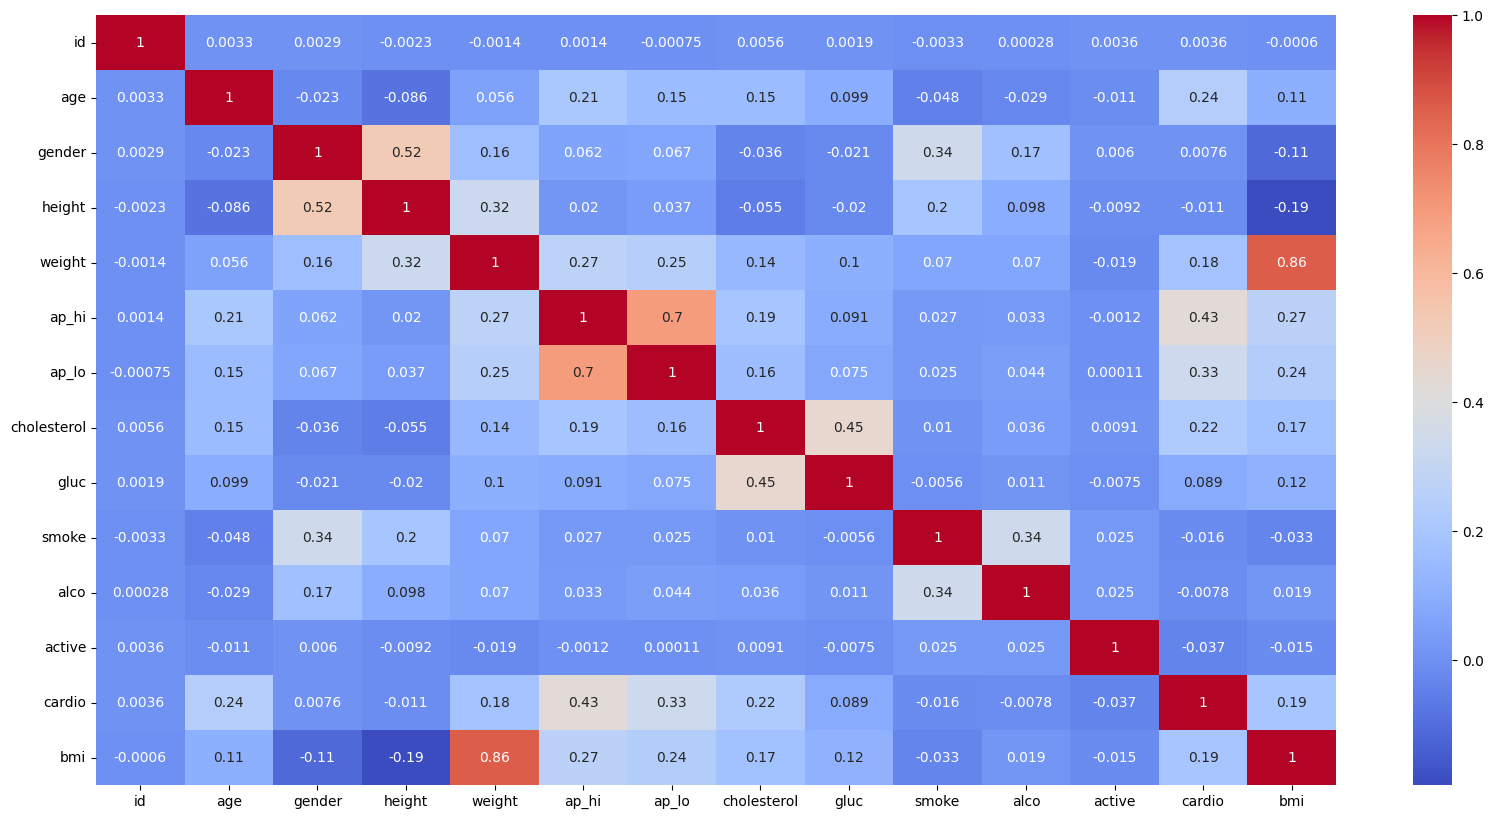

In [123]:
# Creating a heatmap to see the correlation between the features

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Strong correlation between systolic blood pressure and diastolic blood pressure. This is expected. We can remove one of the features.


## Correlations.

Increadibly weak correlations between everything really..
Cardio to Ap_hi and ap_lo is in the 0.43 and 0.33 range.  
negative correlations are height and bmi. mostly because height is divided by 100 to make the formula work. So really it is as correlated as weight. They should be the same.  
Stocastic and Dialistic pressure are highly correlated.  

Height and gender are correlated. not a big suprise.  
Gender and smoker is a shock, I wonder what country or area this data is from.  

In [124]:
# finding out what gender smokes the most

df_smokers = df[df["smoke"] == 1]

df_smokers["gender"].value_counts()

# Interesting. over 80 % of smokers are men.

2    5248
1     791
Name: gender, dtype: int64

In [125]:
# Creating two new datasets.

df_copy = df

# Creating a new dataset with dropped features,
df_0 = df_copy.drop(["ap_hi", "ap_lo", "height", "weight", "bmi"], axis=1)
# Dummy encoding on df_0, Categories: blood pressure category, bmi category and gender
df_0_dummy = pd.get_dummies(df_0, columns=["blood_pressure_category", "bmi_category", "gender"], prefix=["blood_pressure_category","bmi_category", "gender"])

# Creating another new dataset with dropped features
df_1 = df_copy.drop(["bmi_category", "blood_pressure_category", "height", "weight"], axis=1)
# Dummy encoding on gender.
df_1_dummy = pd.get_dummies(df_1, columns=["gender"], prefix = ["gender"])


display(df_0.head(), df_1.head())

,id,age,gender,cholesterol,gluc,smoke,alco,active,cardio,bmi_category,blood_pressure_category
0,0,50,2,1,1,0,0,1,0,Normal,Stage 1 Hypertension
1,1,55,1,3,1,0,0,1,1,Obese Class 1,Stage 2 Hypertension
2,2,51,1,3,1,0,0,0,1,Normal,Stage 1 Hypertension
3,3,48,2,1,1,0,0,1,1,Overweight,Stage 2 Hypertension
4,4,47,1,1,1,0,0,0,0,Normal,Healthy


,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,110,80,1,1,0,0,1,0,21.97
1,1,55,1,140,90,3,1,0,0,1,1,34.93
2,2,51,1,130,70,3,1,0,0,0,1,23.51
3,3,48,2,150,100,1,1,0,0,1,1,28.71
4,4,47,1,100,60,1,1,0,0,0,0,23.01


In [139]:
# Saving csv files from df_0 and df_1

df_0_dummy.to_csv("df_0_with_dummy_encoding.csv", index=False)
df_1_dummy.to_csv("df_1_with_dummy_encoding.csv", index=False)

# Creating a new dataframe with the features that have the highest correlation with the target feature

target = "cardio"
features = df_0.corr().nlargest(6, target)[target].index
df_2 = df_0[features]

display(df_2.head())

# Choosing models to try

In [141]:
# train test split on df_0_dummy
X,y = df_0_dummy.drop("cardio", axis=1), df_0_dummy["cardio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [140]:
print(y)

0        0
1        1
2        1
3        1
4        0
        ..
69994    1
69995    0
69997    1
69998    1
69999    0
Name: cardio, Length: 68520, dtype: int64


In [128]:
# Creating a function to train and test the models

def train_and_test(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy score: ", accuracy_score(y_test, y_pred))
    print("Confusion matrix: ", confusion_matrix(y_test, y_pred))
    print("Classification report: ", classification_report(y_test, y_pred))
    print("F1-score: ", f1_score(y_test, y_pred))
    print("Model: ", model)
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["No Cardiovascular Disease", "Cardiovascular Disease"]).plot()
    plt.show()

Accuracy score:  0.5152131611533699
Confusion matrix:  [[4821 6561]
 [4401 6829]]
Classification report:                precision    recall  f1-score   support

           0       0.52      0.42      0.47     11382
           1       0.51      0.61      0.55     11230

    accuracy                           0.52     22612
   macro avg       0.52      0.52      0.51     22612
weighted avg       0.52      0.52      0.51     22612

F1-score:  0.5547522339561332
Model:  LogisticRegression()


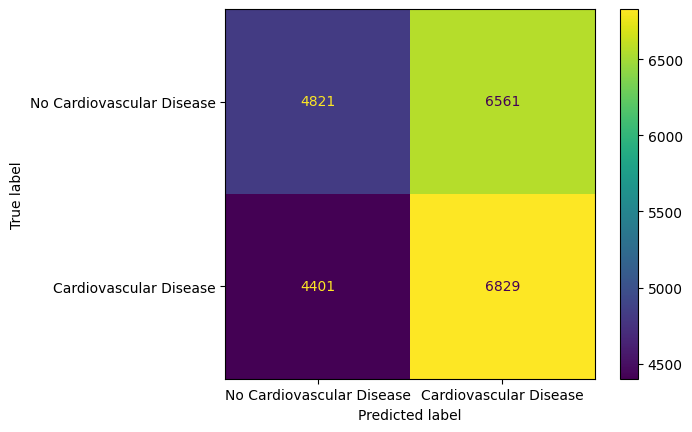

Accuracy score:  0.6435963205377676
Confusion matrix:  [[7277 4105]
 [3954 7276]]
Classification report:                precision    recall  f1-score   support

           0       0.65      0.64      0.64     11382
           1       0.64      0.65      0.64     11230

    accuracy                           0.64     22612
   macro avg       0.64      0.64      0.64     22612
weighted avg       0.64      0.64      0.64     22612

F1-score:  0.6435805581354208
Model:  RandomForestClassifier()


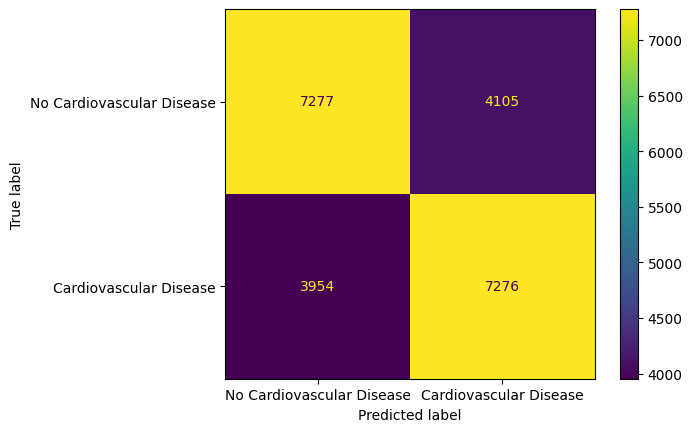

Accuracy score:  0.5309570139748806
Confusion matrix:  [[6134 5248]
 [5358 5872]]
Classification report:                precision    recall  f1-score   support

           0       0.53      0.54      0.54     11382
           1       0.53      0.52      0.53     11230

    accuracy                           0.53     22612
   macro avg       0.53      0.53      0.53     22612
weighted avg       0.53      0.53      0.53     22612

F1-score:  0.5254586129753915
Model:  KNeighborsClassifier()


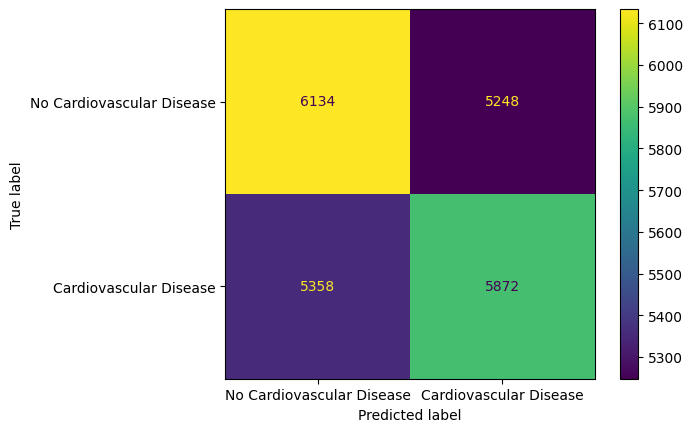

Accuracy score:  0.657880771271891
Confusion matrix:  [[8644 2738]
 [4998 6232]]
Classification report:                precision    recall  f1-score   support

           0       0.63      0.76      0.69     11382
           1       0.69      0.55      0.62     11230

    accuracy                           0.66     22612
   macro avg       0.66      0.66      0.65     22612
weighted avg       0.66      0.66      0.65     22612

F1-score:  0.617029702970297
Model:  GaussianNB()


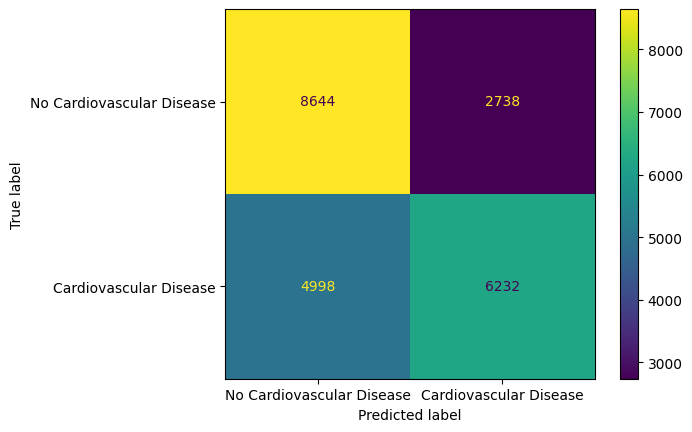

Accuracy score:  0.5769945161860959
Confusion matrix:  [[6506 4876]
 [4689 6541]]
Classification report:                precision    recall  f1-score   support

           0       0.58      0.57      0.58     11382
           1       0.57      0.58      0.58     11230

    accuracy                           0.58     22612
   macro avg       0.58      0.58      0.58     22612
weighted avg       0.58      0.58      0.58     22612

F1-score:  0.5776482536318276
Model:  MultinomialNB()


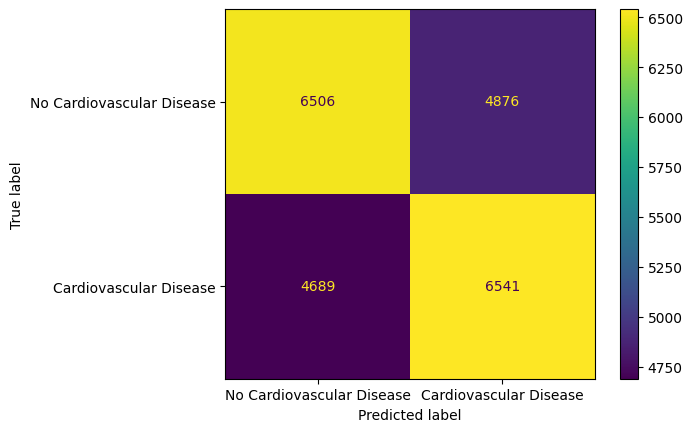

In [129]:
# using train_and_test function for my models

train_and_test(LogisticRegression(), X_train, X_test, y_train, y_test)
train_and_test(RandomForestClassifier(), X_train, X_test, y_train, y_test)
train_and_test(KNeighborsClassifier(), X_train, X_test, y_train, y_test)
train_and_test(GaussianNB(), X_train, X_test, y_train, y_test)
train_and_test(MultinomialNB(), X_train, X_test, y_train, y_test)


## With recall being the more important 
I would argue that recall is the most important metric to consider. This is because it's crucial to identify as many true positives (cases of cardiovascular disease) as possible, even if it means accepting a higher number of false positives (healthy patients incorrectly identified as having cardiovascular disease).  
  
Type 1 error (false positive) is preferred over a Type 2 error (false negative)  
  
a false negative result could lead to a delay in diagnosis and treatment, which can result in serious health consequences or even death.

In [130]:
# Creating a voting classifier

voting_clf = VotingClassifier(estimators=[("lr", LogisticRegression()), ("rf", RandomForestClassifier()), ("knn", KNeighborsClassifier()), ("gnb", GaussianNB()), ("mnb", MultinomialNB())], voting="hard")

voting_clf

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('gnb', GaussianNB()), ('mnb', MultinomialNB())])

# Grid search


Accuracy score:  0.7032991332036087
Confusion matrix:  [[8968 2414]
 [4295 6935]]
Classification report:                precision    recall  f1-score   support

           0       0.68      0.79      0.73     11382
           1       0.74      0.62      0.67     11230

    accuracy                           0.70     22612
   macro avg       0.71      0.70      0.70     22612
weighted avg       0.71      0.70      0.70     22612

F1-score:  0.6739880460663783
Model:  LogisticRegression()


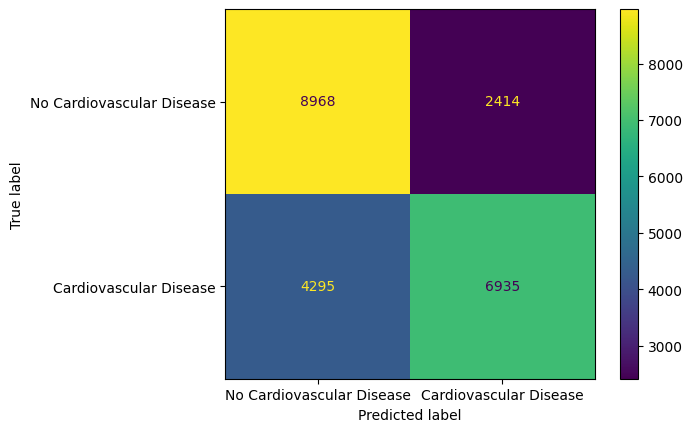

Accuracy score:  0.6453652927649036
Confusion matrix:  [[7316 4066]
 [3953 7277]]
Classification report:                precision    recall  f1-score   support

           0       0.65      0.64      0.65     11382
           1       0.64      0.65      0.64     11230

    accuracy                           0.65     22612
   macro avg       0.65      0.65      0.65     22612
weighted avg       0.65      0.65      0.65     22612

F1-score:  0.6447525805165464
Model:  RandomForestClassifier()


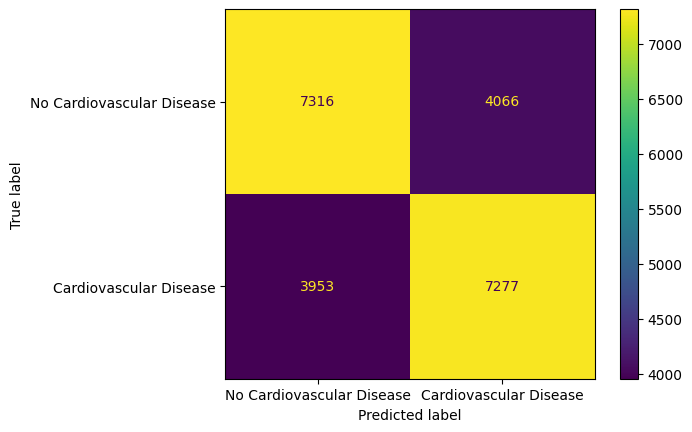

Accuracy score:  0.6661949407394304
Confusion matrix:  [[7786 3596]
 [3952 7278]]
Classification report:                precision    recall  f1-score   support

           0       0.66      0.68      0.67     11382
           1       0.67      0.65      0.66     11230

    accuracy                           0.67     22612
   macro avg       0.67      0.67      0.67     22612
weighted avg       0.67      0.67      0.67     22612

F1-score:  0.6585233441910966
Model:  KNeighborsClassifier()


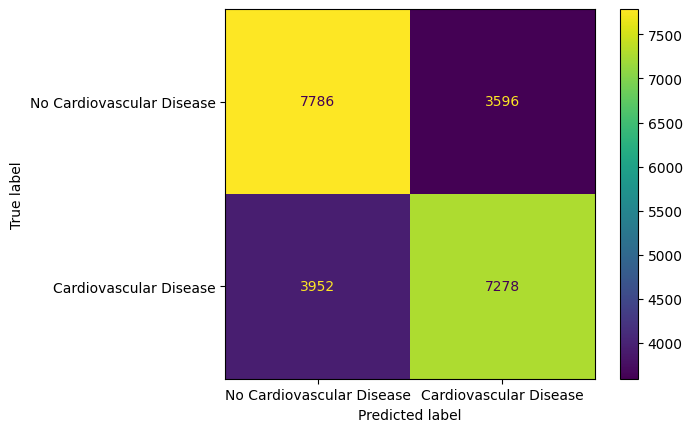

Accuracy score:  0.6868476914912436
Confusion matrix:  [[9364 2018]
 [5063 6167]]
Classification report:                precision    recall  f1-score   support

           0       0.65      0.82      0.73     11382
           1       0.75      0.55      0.64     11230

    accuracy                           0.69     22612
   macro avg       0.70      0.69      0.68     22612
weighted avg       0.70      0.69      0.68     22612

F1-score:  0.6352819984548029
Model:  GaussianNB()


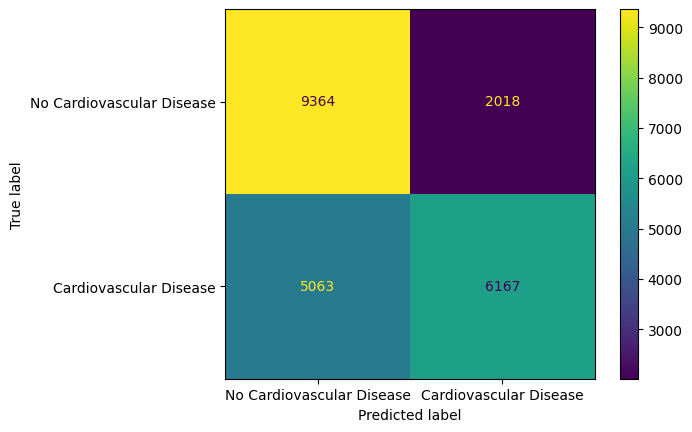

In [131]:
# Scaling data set


scaler = StandardScaler() # creating a StandardScaler object
X_train_scaled = scaler.fit_transform(X_train) # scaling the training data
X_test_scaled = scaler.transform(X_test) # scaling the testing data

# Using train_and_test function on the scaled data set

train_and_test(LogisticRegression(), X_train_scaled, X_test_scaled, y_train, y_test) # using the train_and_test function on all chosen models
train_and_test(RandomForestClassifier(), X_train_scaled, X_test_scaled, y_train, y_test)
train_and_test(KNeighborsClassifier(), X_train_scaled, X_test_scaled, y_train, y_test) 
train_and_test(GaussianNB(), X_train_scaled, X_test_scaled, y_train, y_test)






In [132]:
# Creating a function to find the best parameters for the models

def find_best_params(model, params, X_train, y_train): 
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1, verbose=2) # creating a GridSearchCV object, params is the parameters to try, cv is the number of folds, n_jobs is the number of jobs to run in parallel, verbose is the verbosity level
    grid_search.fit(X_train, y_train) # fitting the model
    print("Best parameters: ", grid_search.best_params_) # printing the best parameters
    print("Best score: ", grid_search.best_score_) # printing the best score
    return grid_search.best_params_ # returning the best parameters

# Finding the best parameters for the models

find_best_params(LogisticRegression(), {"C": [0.1, 1, 10, 100], "solver": ["liblinear"]}, X_train_scaled, y_train) 
# "C": [...] is the regularization parameter, "solver": [...] is the algorithm to use in the optimization problem.

find_best_params(RandomForestClassifier(), {"n_estimators": [10, 100], "max_depth": [None, 5, 10, 20, 30], "min_samples_split": [2, 4, 6], "min_samples_leaf": [1, 2, 4]}, X_train_scaled, y_train) 
# "n_estimators": [...] is the number of trees in the forest, "max_depth": [...] is the maximum depth of the tree, "min_samples_split": [...] is the minimum number of samples required to split an internal node, "min_samples_leaf": [...] is the minimum number of samples required to be at a leaf node.

find_best_params(KNeighborsClassifier(), {"n_neighbors": [3, 4, 5], "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree", "brute"], "leaf_size": [10, 20, 30]}, X_train_scaled, y_train) 
# "n_neighbors": [...] is the number of neighbors to use by default for kneighbors queries, "weights": [...] is the weight function used in prediction, "algorithm": [...] is the algorithm to use for the nearest neighbors search, "leaf_size": [...] is the leaf size passed to BallTree or KDTree.

find_best_params(GaussianNB(), {"var_smoothing": [1e-9, 1e-8, 1e-7]}, X_train_scaled, y_train) 
# "var_smoothing": [...] is the portion of the largest variance of all features that is added to variances for calculation stability.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters:  {'C': 0.1, 'solver': 'liblinear'}
Best score:  0.7042781263123526
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}
Best score:  0.7057593776280416
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
Best score:  0.663195993657979
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters:  {'var_smoothing': 1e-09}
Best score:  0.6889864384485579


{'var_smoothing': 1e-09}

Logistic Reg and RFC got almost the exact same score

KNN and GNB got almost the exact same score.  

Might be able to remove one of them.

In [133]:
find_best_params(LogisticRegression(), {"C": [0.1, 1, 10, 100, 250, 500, 1000], "solver": ["liblinear"]}, X_train_scaled, y_train) 
# "C": [...] is the regularization parameter, "solver": [...] is the algorithm to use in the optimization problem.

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters:  {'C': 0.1, 'solver': 'liblinear'}
Best score:  0.7042781263123526


{'C': 0.1, 'solver': 'liblinear'}

In [134]:
find_best_params(RandomForestClassifier(), {"n_estimators": [10, 100, 250, 500], "max_depth": [None, 5, 10, 20,], "min_samples_split": [2, 4], "min_samples_leaf": [1, 2, 4]}, X_train_scaled, y_train) 
# "n_estimators": [...] is the number of trees in the forest, "max_depth": [...] is the maximum depth of the tree, "min_samples_split": [...] is the minimum number of samples required to split an internal node, "min_samples_leaf": [...] is the minimum number of samples required to be at a leaf node.


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}
Best score:  0.7058029197695059


{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 100}

In [135]:
find_best_params(KNeighborsClassifier(), {"n_neighbors": [3, 4, 5], "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree", "brute"], "leaf_size": [10, 20, 30]}, X_train_scaled, y_train) 
# "n_neighbors": [...] is the number of neighbors to use by default for kneighbors queries, "weights": [...] is the weight function used in prediction, "algorithm": [...] is the algorithm to use for the nearest neighbors search, "leaf_size": [...] is the leaf size passed to BallTree or KDTree.


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
Best score:  0.663195993657979


{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}

In [136]:

find_best_params(GaussianNB(), {"var_smoothing": [1e-9, 1e-8, 1e-7]}, X_train_scaled, y_train) 
# "var_smoothing": [...] is the portion of the largest variance of all features that is added to variances for calculation stability.


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters:  {'var_smoothing': 1e-09}
Best score:  0.6889864384485579


{'var_smoothing': 1e-09}

In [137]:
find_best_params(RandomForestClassifier(), {"n_estimators": [10, 100, 250, 500, 1000], "max_depth": [None, 5, 10, 20,], "min_samples_split": [2, 4, 6], "min_samples_leaf": [1, 2, 4, 6]}, X_train_scaled, y_train) 
# "n_estimators": [...] is the number of trees in the forest, "max_depth": [...] is the maximum depth of the tree, "min_samples_split": [...] is the minimum number of samples required to split an internal node, "min_samples_leaf": [...] is the minimum number of samples required to be at a leaf node.


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.7060425118679203


{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [138]:
find_best_params(RandomForestClassifier(), {"n_estimators": [100], "max_depth": [10], "min_samples_split": [4], "min_samples_leaf": [2]}, X_train_scaled, y_train) 
# "n_estimators": [...] is the number of trees in the forest, "max_depth": [...] is the maximum depth of the tree, "min_samples_split": [...] is the minimum number of samples required to split an internal node, "min_samples_leaf": [...] is the minimum number of samples required to be at a leaf node.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}
Best score:  0.7051494009331585


{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

# Random forest is taking to long. Will create a new function. Going through the pipeline with both dfs and same models. Without Random forest.

Might add it later